<div class="alert alert-block alert-success">

<h1>Bivariate Analysis - Wolrldwide Suicide Rates</h1> 

- **Problem to solve:** find the patterns for increased suicide rates (1985 to 2016) among different cohorts globally, across the socioeconomic spectrum, using exploratory data analysis.
- Using bivariate analysis, I try to determine if there is any relationship between two variables.    
    
**Data Information:** 
    
   - country: Country
   - year: Year
   - sex: Sex (male or female)
   - age: Suicide age range, ages divided into six categories
   - suicides_no: number of suicides
   - population: population of that sex, in that age range, in that country, and in that year
   - suicides/100k pop: Number of suicides per every 100,000 population
   - country-year
   - HDI for year: Human Development Index
   - gdp_for_year: Country GDP in US dollars
   - gdp_per_capita: Ratio of the country’s GDP and its population
   - generation: Generation of the suicides in question, being possible six different categories

In [1]:
# Import the requierd libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset

data=pd.read_csv('suicide_rates.csv')

In [3]:
# let's check the first 5 values

data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# How big is the dataset

data.shape

(27820, 12)

In [5]:
# Check the data types

data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
# Checking the dataset missing values and corresponding percentage

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [8]:
# Descriptive stats of continuous columns

data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe() 

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


# This is an example of Numerical vs Categorical.

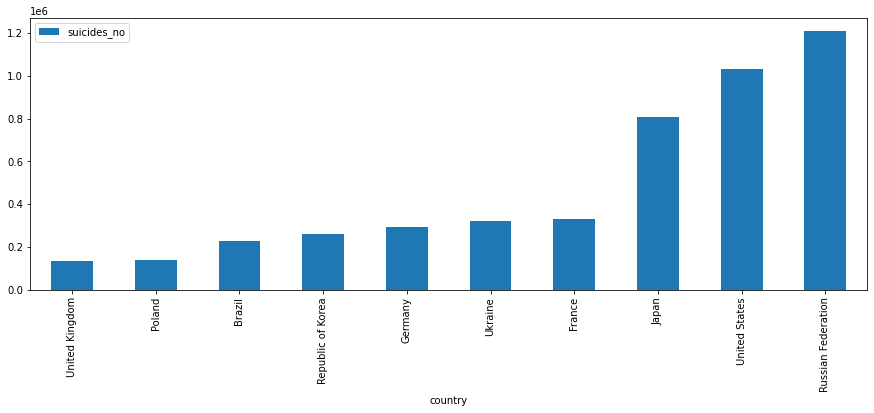

In [9]:
# Top countries by number of suicides

data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

<div class="alert alert-block alert-info">

**Observation:**
* Russia has the highest suicide rate, followed by the US and Japan.
* Russia, the US, and Japan have exceptionally high counts of suicides compared to the others in the lot.

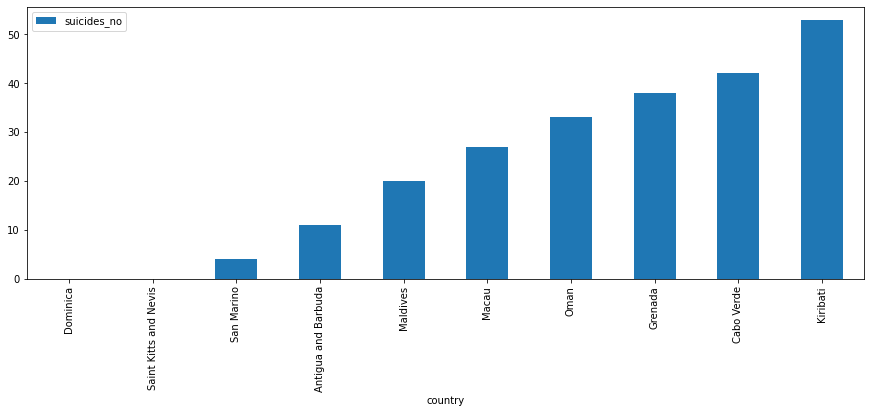

In [10]:
# Bar plot to check Number of Suicides by bottom Countries

data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

plt.show()

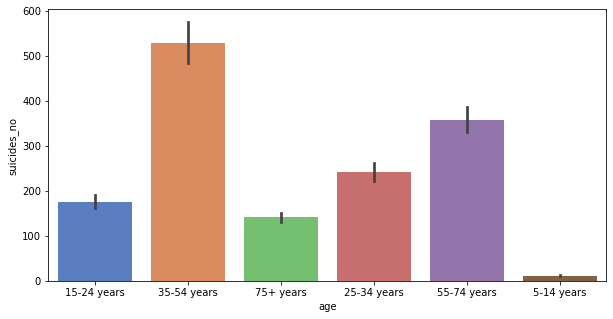

In [11]:
# Bar plot for Number of Suicides Vs Age

plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')  # barplot

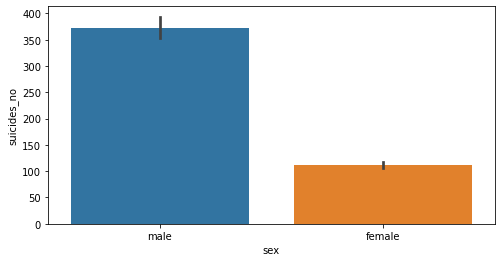

In [12]:
# Bar plot Number of Suicides Vs Sex

plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data)

<div class="alert alert-block alert-info">

**Observation:**
During the 1985 to 2016 period, there were considerably more suicides by males.

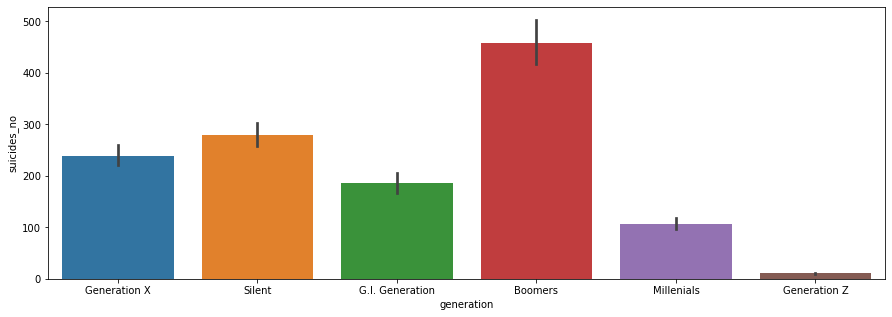

In [13]:
# Bar plot Number of Suicides Vs generation

plt.figure(figsize=(15,5))
ax = sns.barplot(x='generation', y='suicides_no', data=data)

<div class="alert alert-block alert-info">

**Observation:**
Suicides are the highest among the Boomers and lowest among Generation Z.

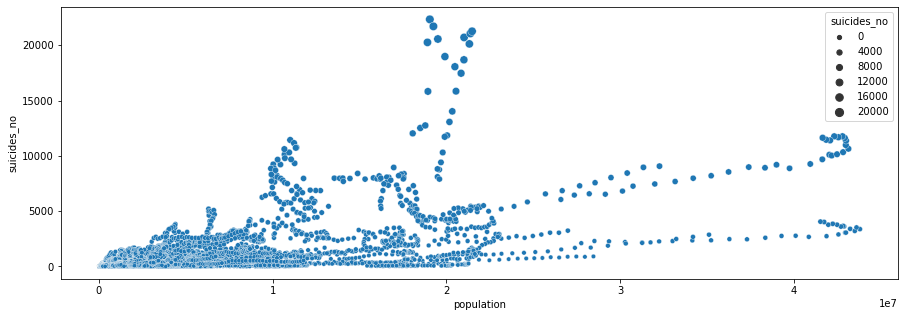

In [14]:
# Scatter plot Number of Suicides Vs population

figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=data['population'],y='suicides_no', data=data, size = "suicides_no") # scatter plot

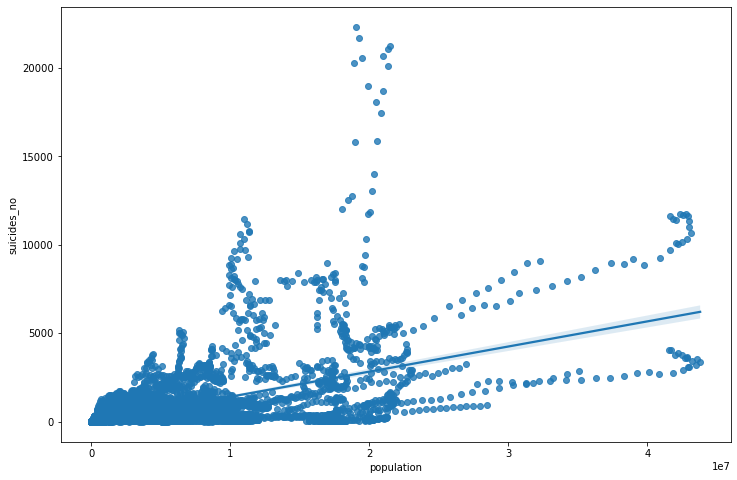

In [15]:
# Scatter plot with a regression line, Number of Suicides Vs population
 
figure = plt.figure(figsize=(12,8))
ax = sns.regplot(x='population',y='suicides_no', data=data )

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

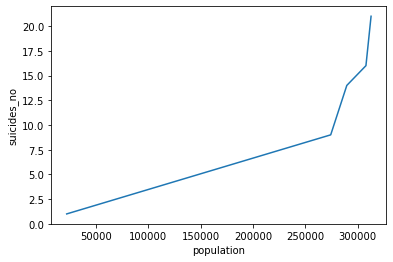

In [16]:
# Relationship between the number of suicides and population

sns.lineplot(x='population',y='suicides_no', data=data.head() )

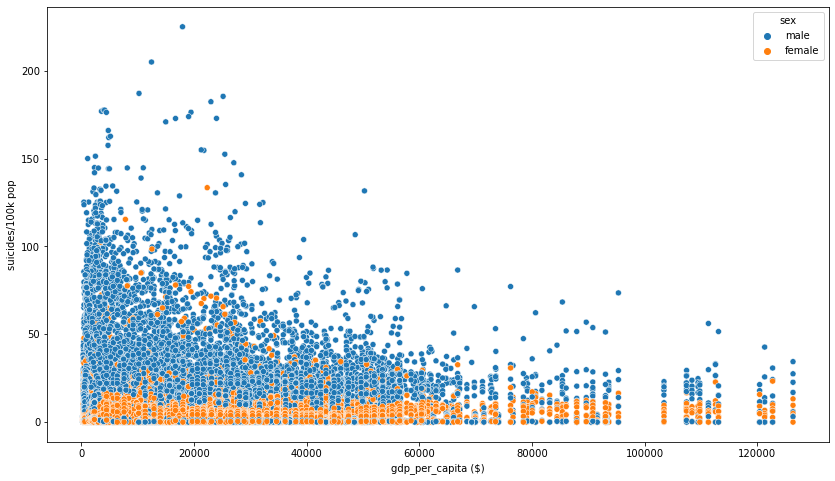

In [17]:
# Scatter plot Number of Suicides/100k Population Vs GDP Per Capita and gender

figure = plt.figure(figsize=(14,8))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data, hue='sex') # scatter plot 
plt.show()

<div class="alert alert-block alert-info">

**Observation:**           
* Looks like higher suicide rates are a bit more prevalent in countries with low GDP per capita.
* However, the gender gap seems to reduce drastically as the GPD per capita increases.

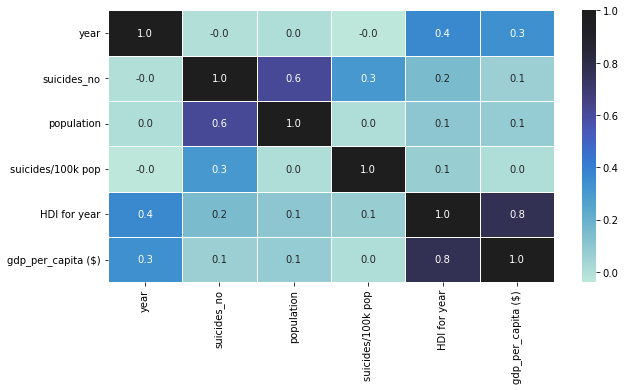

In [18]:
# Correlation among pairs of continuous variables

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

<div class="alert alert-block alert-info">

**Observation:**
    
* The darker the color higher the correlation.
* None of the attributes seem to correlate with real significance.
* Some obvious correlations are that in a larger population, it is very likely that the number of suicides will be more.
* Human Development Index - GDP per capita is the only pair with the most correlation.

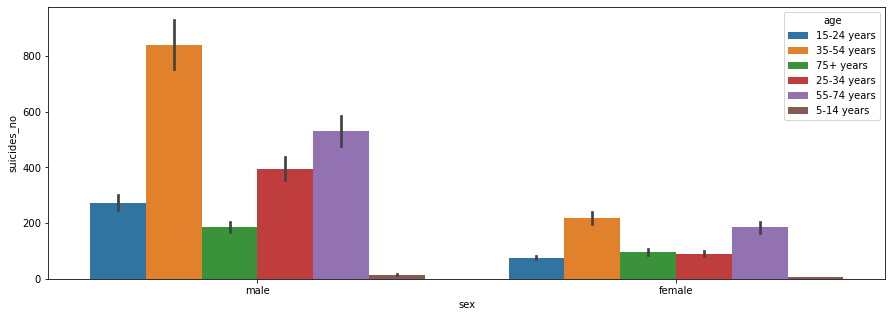

In [19]:
# Bar plot To check Number of suicides by sex and age

plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='age')
plt.show()

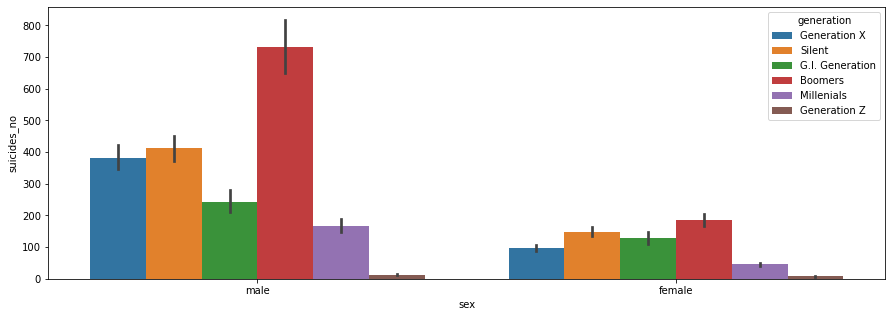

In [20]:
# Bar plot To check Number of suicides by sex and Generation

plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='generation')
plt.show()

<div class="alert alert-block alert-info">

**Observation:**

* Suicides in males, apart from being higher, have a slight variation in distribution across generations compared to the suicides of females across ages.
* In the case of males, Generation X has higher suicide numbers compared to Generation G.I, but in the case of females, it is the opposite.

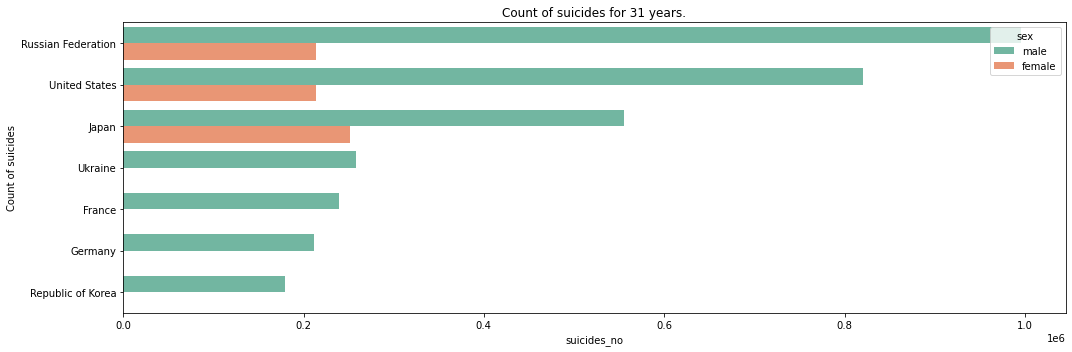

In [21]:
# Checking the No.of suicides: Country Vs Sex

suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()


<div class="alert alert-block alert-info">

**Observation:**
Japan has a higher proportion of female suicides compared to the countries with overall suicide rates even higher; let’s see what the percentage is compared with males.

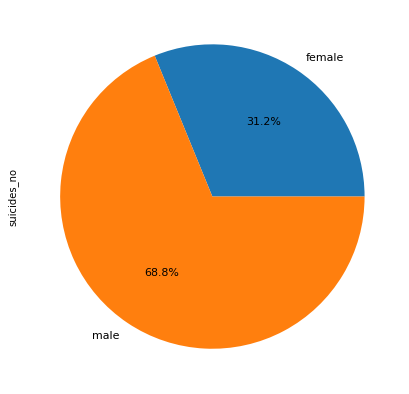

In [22]:
data[data['country'] == 'Japan'].groupby('sex')['suicides_no'].sum().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', fontsize=11);

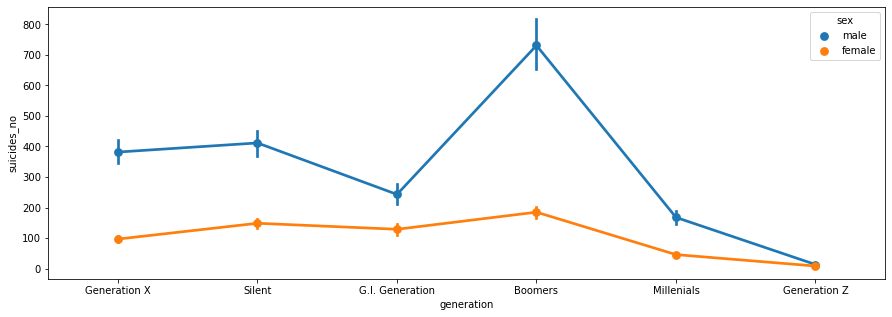

In [23]:
# Average number of suicides across each generation for a given gender along with the confidence intervals - Point Plot

plt.figure(figsize=(15,5))
sns.pointplot(x="generation", y="suicides_no", hue = 'sex',  data=data)
plt.show()

<div class="alert alert-block alert-info">

**Observation:**
    
* Suicides among females generally don't seem to be fluctuating a lot.
* Average suicides of Gen-Z are almost equally distributed across genders.

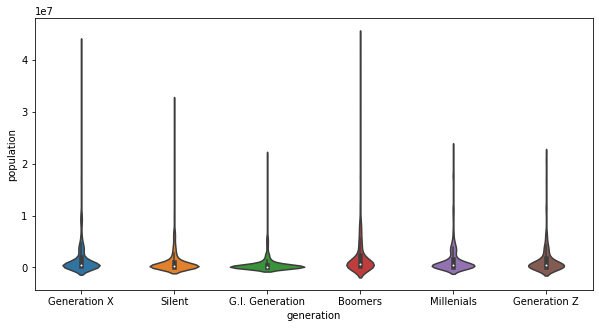

In [24]:
# Distribution of population across each generation - Violin plot

plt.figure(figsize=(10,5))
sns.violinplot(x=data.generation, y=data['population'])
plt.show()

<div class="alert alert-block alert-info">

**Observation:**

* Distribution of population across every generation is highly skewed.

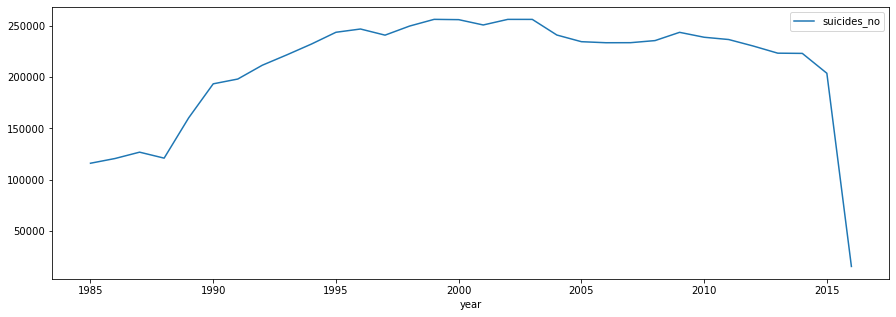

In [25]:
# Checking trends with Temporal Data, suides Rate Vs Years

data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

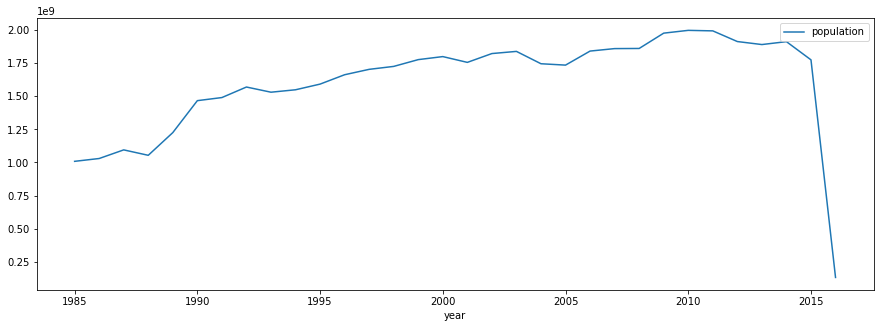

In [26]:
# Checking pattern using Trend plot (1985-2015) Population Vs Years

data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

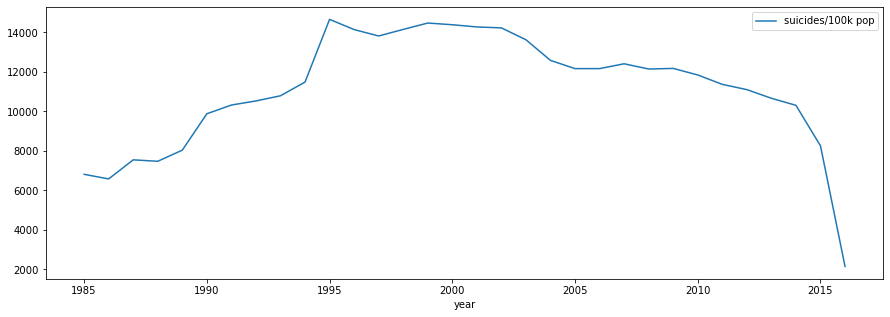

In [27]:
# Checking pattern using Trend plot (1985-2015) suicides/100k pop Vs Years

data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()